# FAIRe Qualitäts-KPIs
Autor: Valentin Kämmerer 
Datum: 28.10.23

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie vergleiche und bewerte ich die Qualität verschiedener Konstruktionen?

Wie schafft man es den Vergleich nach dem FAIR Prinzip zu verwirklichen?

Was sind KPIs und wie wird mit ihnen gearbeitet?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch: 

Das Versuchsziel ist, ein zu vor konstruiertes Fahrzeug in Jupiter zu modellieren und die Komponenten strukturiert in einem Gesamtsystem abzuspeichern. Danach soll anhand dieses Systems mit Hilfe von KPIs die Qualität ermittlet werden innerhalb der 3 Qualitätsdimensionen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Fahrzeug 1](figures/Fahrzeug1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug: 

Kompaktes Fahrzeug mit nur einer Übersetzung und Hinterachsantrieb. 

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [26]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [27]:
# initialize components

#Hinzufügen der Achsen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
pprint.pprint(axles["44294"])
back_axle_right = LegoComponent("back axle right", axles["44294"])
back_axle_left = back_axle_right.clone("back axle left")
front_axle_left = back_axle_right.clone("front axle left")
front_axle_right = back_axle_right.clone("front axle right")

pprint.pprint(axles["32073"])
motor_axle = LegoComponent("motor axle", axles["32073"])


#Hinzufügen der Achsverbindungen
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
pprint.pprint(frame["6538"])
back_axle_connector = LegoComponent("back axle connector", frame["6538"])
front_axle_connector = back_axle_connector.clone("front axle connector")

#Hinzufügen der Achsbefestigungen
pprint.pprint(frame["32123"])
technic_bush_front_axle_left = LegoComponent("technic bush front axle left", frame["32123"])
technic_bush_front_axle_right = technic_bush_front_axle_left.clone("technic bush front axle right")
technic_bush_back_axle_left = technic_bush_front_axle_left.clone("technic bush back axle left")
technic_bush_back_axle_right = technic_bush_front_axle_left.clone("technic bush back axle right")
technic_bush_motor = technic_bush_front_axle_left.clone("technic bush motor")

#Hinzufügen der Rahmen
pprint.pprint(frame["32532"])
front_frame = LegoComponent("front frame", frame["32532"])
back_frame = front_frame.clone("back frame")


#Hinzufügen der Räder
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
pprint.pprint(wheels["56904c02"])
front_wheel_right = LegoComponent("front wheel right", wheels["56904c02"])
front_wheel_left = front_wheel_right.clone("front wheel left")
back_wheel_right = front_wheel_right.clone("back wheel right")
back_wheel_left = front_wheel_right.clone("back wheel left")


#Hinzufügen des Motors
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
pprint.pprint(motors["8883-1"])
motor = LegoComponent("motor", motors["8883-1"])


#Hinzufügen der Batterie
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
pprint.pprint(batteries["8878-1"])
batterie = LegoComponent("batterie", batteries["8878-1"])


#Hinzufügen des Getriebes
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
pprint.pprint(gears["32269"])
gear_motor_axle = LegoComponent("gear motor axle", gears["32269"])
gear_motor_axle.properties["color"] = "red"
pprint.pprint(gear_motor_axle.properties)

pprint.pprint(gears["94925"])
gear_back_axle = LegoComponent("gear back axle", gears["94925"])
gear_back_axle.properties["color"] = "red"
pprint.pprint(gear_back_axle.properties)


{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=44294#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 7,
 'item description': 'Axle 7 studs',
 'item number': 44294,
 'mass [g]': 1.05,
 'price [Euro]': 0.01}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 5,
 'item description': 'Axle 5 studs',
 'item number': 32073,
 'mass [g]': 0.66,
 'price [Euro]': 0.001}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=6538#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '?',
 'item description': 'Technic, Axle Connector 2L (Ridged Undetermined Type)',
 'item number': 6538,
 'mass [g]': 0.4,
 'price [Euro]': 0.03}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=4265c&name=Technic%20Bush%201/2%20Smooth&c

In [28]:
# set properties 

# schon in "initialize components" gemacht

In [29]:
# aggregate components

#Unterbaugruppen "Räder" hinzufügen
right_front_wheel_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "rigth front wheel assembly") 
right_front_wheel_assembly.add([front_axle_right, technic_bush_front_axle_right, front_wheel_right])

left_front_wheel_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "left front wheel assembly")
left_front_wheel_assembly.add([front_axle_left, technic_bush_front_axle_left, front_wheel_left])

left_back_wheel_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "left back wheel assembly")
left_back_wheel_assembly.add([back_axle_left, technic_bush_back_axle_left, back_wheel_left])

right_back_wheel_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "right back wheel assembly")
right_back_wheel_assembly.add([back_axle_right, technic_bush_back_axle_right, back_wheel_right])

#Baugruppe "Vorderräder" erstellen
front_wheels_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "front wheels assembly")
front_wheels_assembly.add([right_front_wheel_assembly, left_front_wheel_assembly, front_axle_connector])

#Baugruppe "Hinterräder" erstellen
back_wheels_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "back wheels assembly")
back_wheels_assembly.add([right_back_wheel_assembly, left_back_wheel_assembly, back_axle_connector])


#Unterbaugruppe "Getriebe" erstellen
gear_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "gear assembly")
gear_assembly.add([gear_motor_axle, gear_back_axle, technic_bush_motor, motor_axle])

#Baugruppe "Antrieb" erstellen
drive_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "drive assembly")
drive_assembly.add([gear_assembly, motor, batterie])

#Baugruppe "Rahmen" erstelle 
frame_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "frame assembly")
frame_assembly.add([front_frame, back_frame])

#Gesamtfahrzeug erstellen
vehicle1 = LegoAssembly(AggregationLayer.SYSTEM, "vehicle")
vehicle1.add([front_wheels_assembly, back_wheels_assembly, drive_assembly, frame_assembly])

vehicle1.get_component_list(-1)

[LegoComponent front axle connector [7249ff90-fa3e-4d2f-850f-427141ef7fb2],
 LegoComponent front axle right [a941b00b-fbb1-4a4c-be70-fa8eecd7fec3],
 LegoComponent technic bush front axle right [fbb37801-698e-4c64-9886-39ea6a78360c],
 LegoComponent front wheel right [8df668a6-8b51-4010-9cee-a4a2fa84b981],
 LegoComponent front axle left [874c59b3-25eb-4b5b-a01c-93cf1aded44a],
 LegoComponent technic bush front axle left [3515926e-2def-42b8-a0b6-3b029ce06f09],
 LegoComponent front wheel left [bf766da2-ac1e-4f34-8c83-9ad23b49db10],
 LegoComponent back axle connector [d970c8f4-4493-487c-8536-45701273de13],
 LegoComponent back axle right [b3b4d83d-1dcd-4d93-9a23-9ff8c32dbf08],
 LegoComponent technic bush back axle right [db461acf-a124-4d33-a4ee-6758a492b543],
 LegoComponent back wheel right [68a6a729-4621-4ef1-b2c3-3f418aaf8095],
 LegoComponent back axle left [8d7ae26c-4e5e-4535-ae98-5dc5a55bd463],
 LegoComponent technic bush back axle left [7cb96ba0-db5b-4cf9-8b4e-8ed1454d8f3f],
 LegoCompone

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

1.KPI: Der erste KPI beschreibt die Akzeptanz anhand der Gesamtmasse des Fahrzeugs berechnet aus der Summe der Massen aller Teile.
$$
kpi\_mass = \sum\nolimits_{n=0}^NEinzelmassen
$$

2.KPI: Der zweite KPI beschreibt die Verfügbarkeit anhand der maximalen Lieferzeit der Komponenten des Fahrzeugs. Dabei wird nicht die Lieferzeit addiert, sondern das Bauteil mit der längsten Lieferzeit rausgesucht.
$$
  kpi\_delivery\_time = max (Einzellieferzeiten)
$$

3.KPI: Der dritte KPI beschreibt den Aufwand anhand der Materialkosten des Fahrzeugs. Dabei werden die kosten aller einzel Komponenten addiert. 
$$
  kpi\_price = \sum\nolimits_{n=0}^NEinzelpreise
$$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [30]:
# calculate the KPIs for your car
total_mass1 = calculation_rules.kpi_mass(vehicle1)
max_delivery_time1 = calculation_rules.kpi_delivery_time(vehicle1)
total_price1 = calculation_rules.kpi_price(vehicle1) 

In [31]:
# print your KPIs
print("Gesamtmasse: ", total_mass1, "g")
print("Maximale Lieferzeit: ",max_delivery_time1, "days")
print("Gesamtpreis: ", total_price1, "Euro")

Gesamtmasse:  194.74999999999997 g
Maximale Lieferzeit:  13 days
Gesamtpreis:  76.51100000000002 Euro


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [32]:
# export car and its properties

# Add KPI to system
vehicle1.properties["mass [g]"] = total_mass1
vehicle1.properties["price [Euro]"] = total_price1
vehicle1.properties["delivery time [days]"] = max_delivery_time1

with open("vehicle1.json", "w") as fp:
    json.dump(vehicle1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Mein Ziel ist, den Preis meines 2.Fahrzeugs zu senken und dass es günstiger ist als das 1.Fahrzeug. Außerdem soll die Lieferzeit geringer sein. Zusätzlich habe ich bei der Konstuktion von Fahrzeug 2 vorallem drauf geachtet, dass es besser beim Fahren performt. Bedeutet, stabilere Konstruktion, bessere Übersetzung und Vorder- statt Heckantrieb. Die Masse soll somit mehr sein als beim 1.Fahrzeug, da dann auch mehr Anpressdruck existiert und sich das Fahrverhalten verbessert.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Fahrzeug 2](figures/Fahrzeug2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Breites und robustes Fahrzeug mit 2 Übersetzungen und Vorderantrieb.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [33]:
# initialize components

#Hinzufügen der Achsen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
pprint.pprint(axles["3708"])
front_axle = LegoComponent("front axle", axles["3708"])

pprint.pprint(axles["3707"])
gear_axle = LegoComponent("gear axle", axles["3707"])

pprint.pprint(axles["32073"])
motor_axle = LegoComponent("motor axle", axles["32073"])


#Hinzufügen der Achsbefestigungen
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
pprint.pprint(frame["32123"])
first_technic_bush_front_axle = LegoComponent("first technic bush front axle", frame["32123"])
second_technic_bush_front_axle = first_technic_bush_front_axle.clone("second technic bush front axle")
first_technic_bush_gear_axle = first_technic_bush_front_axle.clone("first technic bush gear axle")
second_technic_bush_gear_axle = first_technic_bush_front_axle.clone("second technic bush gear axle")
technic_bush_motor_axle = first_technic_bush_front_axle.clone("technic bush motor axle")

#Hinzufügen der Rahmen
pprint.pprint(frame["32532"])
back_frame = LegoComponent("back frame", frame["32532"])
top_front_frame = back_frame.clone("top front frame")
low_front_frame = back_frame.clone("low front frame")

pprint.pprint(frame["32531"])
right_frame = LegoComponent("right frame", frame["32531"])
left_frame = right_frame.clone("left frame")

#Hinzufügen der Stütze für den Motor
pprint.pprint(frame["3702"])
technic_brick = LegoComponent("technic brick", frame["3702"])

#Hizufügen der Achsenpins der Hinterräder
pprint.pprint(frame["3749"])
axle_pin_right_back_wheel = LegoComponent("axle pin right back wheel", frame["3749"])
axle_pin_left_back_wheel = axle_pin_right_back_wheel.clone("axle pin left back wheel")

#Hinzufügen der Pins zum Verbinden der Rahmen
pprint.pprint(frame["3673"])
first_pin_left = LegoComponent("first pin left", frame["3673"])
second_pin_left = first_pin_left.clone("second pin left")
first_pin_right = first_pin_left.clone("first pin right")
second_pin_right = first_pin_left.clone("second pin right")
first_pin_front = first_pin_left.clone("first pin front")
second_pin_front = first_pin_left.clone("second pin front")


#Hinzufügen der Räder
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
pprint.pprint(wheels["3482c01"])
front_wheel_right = LegoComponent("front wheel right", wheels["3482c01"])
front_wheel_left = front_wheel_right.clone("front wheel left")
back_wheel_right = front_wheel_right.clone("back wheel right")
back_wheel_left = front_wheel_right.clone("back wheel left")


#Hinzufügen des Motors
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
pprint.pprint(motors["8883-1"])
motor = LegoComponent("motor", motors["8883-1"])


#Hinzufügen der Batterie
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
pprint.pprint(batteries["2847c01"])
batterie = LegoComponent("batterie", batteries["2847c01"])


#Hinzufügen des Getriebes
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
pprint.pprint(gears["3647"])
gear_motor_axle = LegoComponent("gear motor axle", gears["3647"])
gear_motor_axle.properties["color"] = "red"
pprint.pprint(gear_motor_axle.properties)
gear_front_axle = gear_motor_axle.clone("gear front axle")
gear_front_axle.properties["color"] = "red"
pprint.pprint(gear_front_axle.properties)

pprint.pprint(gears["32498"])
gear_gear_axle = LegoComponent("gear gear axle", gears["32498"])
gear_gear_axle.properties["color"] = "red"
pprint.pprint(gear_gear_axle.properties)

pprint.pprint(["4716"])
worm_gear_axle = LegoComponent("worm gear axle", gears["4716"])
worm_gear_axle.properties["color"] = "red"
pprint.pprint(worm_gear_axle.properties)


{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3708#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 12,
 'item description': 'Axle 12 studs',
 'item number': 3708,
 'mass [g]': 1.82,
 'price [Euro]': 0.02}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3707#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 8,
 'item description': 'Axle 8 studs',
 'item number': 3707,
 'mass [g]': 1.18,
 'price [Euro]': 0.01}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 5,
 'item description': 'Axle 5 studs',
 'item number': 32073,
 'mass [g]': 0.66,
 'price [Euro]': 0.001}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=4265c&name=Technic%20Bush%201/2%20Smooth&category=%5BTechnic%5D#T=

In [34]:
# set properties
#schon in "initialize components" gemacht

In [35]:
# aggregate components
#Baugruppe "Vorderräder" erstellen
front_wheels_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "front wheels assembly")
front_wheels_assembly.add([front_wheel_right, front_wheel_left, front_axle, first_technic_bush_front_axle, second_technic_bush_front_axle ])


#Unterbaugruppe "linkes Hinterrad" erstellen
left_back_wheel_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "left back wheel assembly")
left_back_wheel_assembly.add([axle_pin_left_back_wheel, back_wheel_left])

#Unterbaugruppe "rechtes Hinterrad" erstellen
right_back_wheel_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "right back wheel assembly")
right_back_wheel_assembly.add([axle_pin_right_back_wheel, back_wheel_right])

#Baugruppe "Hinterräder" erstellen
back_wheels_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "back wheels assembly")
back_wheels_assembly.add([left_back_wheel_assembly, right_back_wheel_assembly])


#Unterbaugruppe "Getriebe" erstellen
gear_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "gear assembly")
gear_assembly.add([gear_axle, motor_axle, first_technic_bush_gear_axle, second_technic_bush_gear_axle, technic_bush_motor_axle, gear_motor_axle, gear_front_axle, gear_gear_axle, worm_gear_axle])

#Baugruppe "Antrieb" erstellen
drive_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "drive assembly")
drive_assembly.add([gear_assembly, motor, batterie])


#Unterbraugruppe "linke Rahmen" erstellen
left_frame_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "left frame assembly")
left_frame_assembly.add([left_frame, first_pin_left, second_pin_left])

#Unterbraugruppe "rechter Rahmen" erstellen
right_frame_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "right frame assembly")
right_frame_assembly.add([right_frame, first_pin_right, second_pin_right])

#Unterbraugruppe "vordere Rahmen" erstellen
front_frame_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "front frame assembly")
front_frame_assembly.add([top_front_frame, low_front_frame, first_pin_front, second_pin_front])

#Baugruppe "Rahmen" erstellen
frame_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "frame assembly")
frame_assembly.add([back_frame, technic_brick, left_frame_assembly, right_frame_assembly, front_frame_assembly])


#Gesamtfahrzeug erstellen
vehicle2 = LegoAssembly(AggregationLayer.SYSTEM, "vehicle")
vehicle2.add([front_wheels_assembly, back_wheels_assembly, drive_assembly, frame_assembly])

vehicle2.get_component_list(-1)


[LegoComponent front wheel right [df794b74-d7d2-4795-a82e-8057f12ef7f4],
 LegoComponent front wheel left [f1ea7ddd-1af7-4666-adf8-651eeec6602e],
 LegoComponent front axle [4125840b-ff13-42ac-b800-ee715d6e0518],
 LegoComponent first technic bush front axle [ea8544b1-1534-4b00-a513-42738216109c],
 LegoComponent second technic bush front axle [13c29444-db43-488f-a423-dec1f00c1d87],
 LegoComponent axle pin left back wheel [4006c29e-1ad1-4cd2-a933-9c352e19b0dd],
 LegoComponent back wheel left [eccfdadc-abc4-4557-a545-c628d7d9c07c],
 LegoComponent axle pin right back wheel [7d3d4b95-8e39-4049-aad0-6e00f03a40a1],
 LegoComponent back wheel right [8c4916b4-a7e6-428f-bf46-2d91c853c28e],
 LegoComponent motor [99130b4e-6fc3-4459-9cde-1b947d18c04e],
 LegoComponent batterie [14d5f18a-2393-4a98-85bd-e3ba7312340d],
 LegoComponent gear axle [ccbec7f7-9e02-42c2-aab1-d57c83fa2256],
 LegoComponent motor axle [a8e97dff-fbb2-4ff5-851c-baf86e80a68b],
 LegoComponent first technic bush gear axle [4732a5c4-75f9

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [36]:
# calculate the KPIs for your car
total_mass2 = calculation_rules.kpi_mass(vehicle2)
max_delivery_time2 = calculation_rules.kpi_delivery_time(vehicle2)
total_price2 = calculation_rules.kpi_price(vehicle2) 

In [37]:
# print your KPIs
print("Gesamtmasse: ", total_mass2, "g")
print("Maximale Lieferzeit: ",max_delivery_time2, "days")
print("Gesamtpreis: ", total_price2, "Euro")

Gesamtmasse:  266.08 g
Maximale Lieferzeit:  12 days
Gesamtpreis:  24.65100000000002 Euro


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [38]:
# export car and its properties

# Add KPI to system
vehicle2.properties["mass [g]"] = total_mass2
vehicle2.properties["price [Euro]"] = total_price2
vehicle2.properties["delivery time [days]"] = max_delivery_time2

with open("vehicle2.json", "w") as fp:
    json.dump(vehicle2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

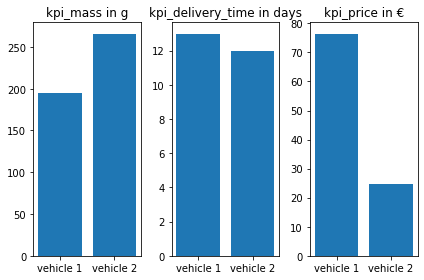

In [39]:
# plot the data, save diagramm as svg-file
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3)
axs[0].bar(['vehicle 1', 'vehicle 2'], [total_mass1, total_mass2])
axs[0].set_title('kpi_mass in g')


axs[1].bar(['vehicle 1', 'vehicle 2'], [max_delivery_time1, max_delivery_time2])
axs[1].set_title('kpi_delivery_time in days')


axs[2].bar(['vehicle 1', 'vehicle 2'], [total_price1, total_price2])
axs[2].set_title('kpi_price in €')


plt.tight_layout()
plt.savefig('Diagramm.svg')

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Die KPIs konnten beim zweiten Fahrzeug verbessert werden. Vorallem der Preis ist von 76€ auf 24€ enorm gesunken und auch die Lieferzeit hat sich von 13 auf 12 Tage um einen Tag verkürzt. Die Masse ist gestiegen, dass war aber so gewollt, denn das zweite Fahrzeug sollte robuster werden und mehr Anpressdruck besitzen. Grundsätzlich kann man anhand des Diagramms gut erkennen, dass das zweite Fahrzeug deutlich besser ist, da es schneller geliefert wird und deutlich günstiger ist, obwohl ein besseres Getriebe vorhanden ist und eine bessere Stabilität. Fahrzeug 2 hat also eine höhere Qualität wenn man die drei Qualitätsdimensionen mit den gewählten kpis zum vergleichen nutzt.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

FAIR-Prinzipien setzten sich aus "Findable", "Accessible", "Interoperale" und "Resuable" zusammen. Die Kpis sind in der calculation_rules Datei abgespeichert als Funktionen. Die Funktionen sind den Kpis direkt zugeordnet und die Kpis sind in der ausarbeitung definiert und beschrieben worden. Die calculation_rules Datei wird in GitLab hochgeladen in ein Repository. Damit sind sie jederzeit zu finden und abrufbar wenn man den Zugang zu dem generellen Repository besitzt. Von da aus kann man die einzelnen kpis nutzen und verwenden. Somit ist 'Findable' und "Accesible" erfüllt. 'Interoperable' ist ebenfalls erfüllt, da die Funktionen der Kpis in einer allgemeinen Programmiersprache geschrieben sind. "Resuable" ist auch erfüllt, da die Daten abgespeichert sind in GitLab und somit jederzeit aufrufbar sind. 


## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Ich habe gelernt, wie ich Komponenten von z.B. Fahrzeugen in Jupiter hinzufüge mit samt ihrer Eigenschaften. Diese dann in ein Gesatmsystem zusammenfasse und vergleiche. Das Vergleichen und die Qualitätsbewertung erfolgt über KPIs. Zusätzlich habe ich gelernt, mit Hilfe verschiedener Programme wie Jupiter Notebook, Git und GitLab zu arbeiten, meine Dateien sauber abzuspeicher und alles zu dokumentieren und somit die FAIR-Prinzipien einzuhalten und als Leitfaden zu nutzen.